TODO: clean up this notebook

# Sample network

In [1]:
from itertools import chain, product, combinations
import json

from scipy import sparse
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
artists = pd.read_json('../data/artists_table.json', orient='table')
songs = pd.read_json('../data/songs_table.json', orient='table')

In [3]:
artists.head()

,name,week_min,week_max,weeks_on_chart_total,weeks_on_chart_longest,weeks_on_chart_mean,rank_min,rank_mean5,rank_mean,rank_median,rank_min_mean,rank_min_mean5,rank_min_median,num_songs,y_min,y_max
artist_id,,,,,,,,,,,,,,,,
0,"""Weird Al"" Yankovic",2006-10-18,2014-08-08,5,3.0,2.500000,39,78.166667,78.166667,79.50,60.500000,60.5,60.5,2,-0.272503,0.508700
1,'N Sync,1999-07-12,2002-02-26,145,26.0,21.857143,1,7.040000,33.268531,21.50,10.142857,4.6,5.0,7,-1.000000,-0.736950
2,10 Years,2006-03-29,2006-04-05,2,2.0,2.000000,94,94.500000,94.500000,94.50,94.000000,94.0,94.0,1,-0.328127,-0.326209
3,112,1999-07-12,2003-09-09,97,29.0,19.166667,4,30.480000,53.142857,52.75,34.500000,26.4,32.0,6,-1.000000,-0.583505
4,17,2018-08-18,2018-08-18,1,NaN,NaN,41,41.000000,41.000000,41.00,41.000000,41.0,41.0,1,0.911769,0.911769


## Number of collaborations between two artists

How is it distributed?

Create an 'adjacency' matrix of # collaborated songs between two artists

In [5]:
A = sparse.lil_matrix((len(artists), len(artists)), dtype=int)

for song_collaborators in songs.collaborators_id:
    for x, y in combinations(sorted(song_collaborators), 2):
        A[x, y] += 1  # only to the right top of the diagonal filled

In [6]:
A = A.tocsc()

Flatten--get elements of the upper triangle.

In [7]:
np.asarray(A[:5,:5].todense().flatten())[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [119]:
A[np.triu_indices(A.shape[0], k=0)].shape, A[np.triu_indices(A.shape[0], k=1)].shape

((1, 2449791), (1, 2447578))

In [8]:
num_collabs = np.asarray(A[np.triu_indices(A.shape[0], k=1)])[0]

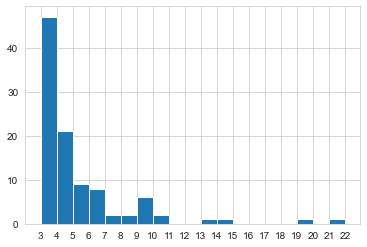

In [9]:
ax = pd.Series(num_collabs[num_collabs > 2]).hist(bins=np.arange(3,23))
ax.set_xticks(np.arange(3, 23))

In [12]:
u, c = np.unique(num_collabs, return_counts=True)
display(pd.DataFrame({'# Collaborations': u[1:], '# Artists': c[1:]}))

,# Collaborations,# Artists
0,1,2202
1,2,202
2,3,47
3,4,21
4,5,9
5,6,8
6,7,2
7,8,2
8,9,6
9,10,2


In [85]:
np.sum(num_collabs > 4)

33

In [52]:
A.argmax()

1284713

In [122]:
np.where((np.arange(len(artists)**2) == A.argmax()).reshape((len(artists), len(artists))))

(array([580]), array([1173]))

In [123]:
artists.loc[[580, 1173]]

,name,week_min,week_max,weeks_on_chart_total,weeks_on_chart_longest,weeks_on_chart_mean,rank_min,rank_mean5,rank_mean,rank_median,rank_min_mean,rank_min_mean5,rank_min_median,num_songs,y_min,y_max
artist_id,,,,,,,,,,,,,,,,
580,Drake,2009-05-21,2019-07-06,2124,36.0,13.188679,1,1.00,59.188800,64.25,42.145161,1.0,40.0,186,-0.013289,1.00000
1173,Lil Wayne,2002-07-02,2019-06-01,1568,40.0,15.895833,1,2.84,61.034964,62.50,45.762590,1.6,43.0,139,-0.702425,0.99041


In [112]:
artists.loc[np.where(A[170, 170:].toarray()[0])[0]]

,name,week_min,week_max,weeks_on_chart_total,weeks_on_chart_longest,weeks_on_chart_mean,rank_min,rank_mean5,rank_mean,rank_median,rank_min_mean,rank_min_mean5,rank_min_median,num_songs,y_min,y_max
artist_id,,,,,,,,,,,,,,,,
1651,Robin Thicke,2006-12-20,2015-10-09,136,48.0,19.285714,1,30.0,61.91071,64.75,47.125,27.4,48.5,8,-0.25524,0.625702


In [124]:
artists.loc[np.where(A[:, 581].toarray()[0])[0]]

,name,week_min,week_max,weeks_on_chart_total,weeks_on_chart_longest,weeks_on_chart_mean,rank_min,rank_mean5,rank_mean,rank_median,rank_min_mean,rank_min_mean5,rank_min_median,num_songs,y_min,y_max
artist_id,,,,,,,,,,,,,,,,
48,Adam Hicks,2011-04-28,2011-05-12,4,3.0,3.000000,51,80.000000,80.000000,79.50,69.500000,69.500000,69.5,2,0.180436,0.184272
135,Ashanti,2001-11-13,2018-10-13,281,32.0,21.923077,1,2.080000,39.972016,27.00,22.133333,1.600000,8.0,15,-0.765721,0.927113
140,Ashley Parker Angel,2006-04-26,2006-08-02,17,15.0,8.500000,12,46.250000,59.683333,64.75,35.000000,35.000000,35.0,2,-0.320455,-0.293602
169,BT,2003-09-09,2003-09-23,3,3.0,3.000000,98,98.000000,98.000000,98.00,98.000000,98.000000,98.0,1,-0.583505,-0.579668
196,Belly,2016-03-12,2019-04-27,20,17.0,10.000000,65,72.700000,77.911765,77.50,66.500000,66.500000,66.5,2,0.668174,0.980819
199,Benny Benassi,2011-09-15,2011-10-06,4,4.0,4.000000,43,75.250000,75.250000,79.50,43.000000,43.000000,43.0,1,0.218797,0.224551
249,Bobby Pinson,2005-06-08,2005-07-20,7,7.0,7.000000,88,91.600000,93.428571,93.00,88.000000,88.000000,88.0,1,-0.408686,-0.397178
276,Bravehearts,2001-02-27,2001-07-10,20,20.0,20.000000,26,30.600000,53.650000,48.50,26.000000,26.000000,26.0,1,-0.836690,-0.800247
291,Brooks,1999-10-11,2009-04-09,293,20.0,15.526316,25,33.520000,66.911690,65.50,51.421053,31.600000,53.0,19,-0.975065,-0.024798


# num collaborations for each artists 

In [143]:
drakes_collaborators = np.concatenate([A[:i, i].toarray().T, A[i, i+1:].toarray()], axis=1)

In [149]:
artists.loc[np.where(drakes_collaborators[0])[0]].sample(10)

,name,week_min,week_max,weeks_on_chart_total,weeks_on_chart_longest,weeks_on_chart_mean,rank_min,rank_mean5,rank_mean,rank_median,rank_min_mean,rank_min_mean5,rank_min_median,num_songs,y_min,y_max
artist_id,,,,,,,,,,,,,,,,
7,21 Savage,2016-10-01,2019-07-06,227,41.0,11.315789,1,16.280000,68.457062,70.0,58.545455,11.6,67.0,33,0.723798,1.000000
974,Jordin Sparks,2007-06-06,2011-05-26,79,31.0,19.500000,8,34.710000,44.205607,25.0,26.400000,26.4,15.0,5,-0.209207,0.188108
1053,Ken,2006-06-21,2006-11-15,4,3.0,3.000000,90,95.333333,95.333333,95.0,95.000000,95.0,95.0,2,-0.305110,-0.264831
2120,Wiz Khalifa,2010-09-30,2018-10-06,350,52.0,15.636364,1,5.880000,69.130773,75.5,53.785714,3.4,60.0,28,0.122894,0.925195
1837,Sum 41,2001-08-28,2001-12-18,12,12.0,12.000000,66,73.600000,84.333333,82.0,66.000000,66.0,66.0,1,-0.786820,-0.756131
776,Grouplove,2011-12-15,2012-09-21,20,20.0,20.000000,42,45.800000,61.600000,59.0,42.000000,42.0,42.0,1,0.243732,0.320729
1656,Roman GianArthur,2015-05-22,2015-10-09,21,21.0,21.000000,22,23.600000,42.952381,33.0,22.000000,22.0,22.0,1,0.587341,0.625702
228,Birdman,2006-09-13,2013-10-04,114,20.0,14.000000,21,40.120000,69.541176,66.5,54.500000,36.0,52.5,10,-0.282093,0.424305
1020,Kane Brown,2015-11-13,2019-07-06,104,27.0,20.000000,15,37.840000,66.083306,66.5,52.111111,32.4,57.0,9,0.635293,1.000000


In [209]:
ids = [287, 722, 588, 168]

In [213]:
song_sample = songs[songs.collaborators_id.apply(lambda x: set(x).issubset(set(ids)))]
artist_sample = artists.loc[ids]

In [216]:
artist_sample.name

artist_id
287    Britney Spears
722                 G
588          Dua Lipa
168         BLACKPINK
Name: name, dtype: object

In [215]:
artist_sample.to_json('../data/artists_table_sample.json', orient='table')
song_sample.to_json('../data/songs_table_sample.json', orient='table')

In [180]:
artists[artists.name == 'Dixie Chicks']

,name,week_min,week_max,weeks_on_chart_total,weeks_on_chart_longest,weeks_on_chart_mean,rank_min,rank_mean5,rank_mean,rank_median,rank_min_mean,rank_min_mean5,rank_min_median,num_songs,y_min,y_max
artist_id,,,,,,,,,,,,,,,,
565,Dixie Chicks,1999-07-12,2007-03-21,210,29.0,18.25,4,19.2,58.256201,54.0,34.692308,12.4,31.0,13,-1.0,-0.230306


In [179]:
artists.sort_values('week_min')

,name,week_min,week_max,weeks_on_chart_total,weeks_on_chart_longest,weeks_on_chart_mean,rank_min,rank_mean5,rank_mean,rank_median,rank_min_mean,rank_min_mean5,rank_min_median,num_songs,y_min,y_max
artist_id,,,,,,,,,,,,,,,,
1825,Steve Wariner,1999-07-12,1999-12-06,19,20.0,17.000000,42,65.7,75.285714,75.75,57.500000,57.500000,57.5,2,-1.000000,-0.959721
587,Dru Hill,1999-07-12,2003-07-22,45,17.0,13.000000,25,70.1,79.254167,89.00,67.250000,67.250000,78.0,4,-1.000000,-0.596931
565,Dixie Chicks,1999-07-12,2007-03-21,210,29.0,18.250000,4,19.2,58.256201,54.00,34.692308,12.400000,31.0,13,-1.000000,-0.230306
2089,Vitamin C,1999-07-12,2001-01-23,35,14.0,11.666667,18,39.0,59.332011,55.50,33.666667,33.666667,38.0,3,-1.000000,-0.846280
1299,Mary Chapin Carpenter,1999-07-12,1999-08-23,7,7.0,7.000000,85,86.8,89.285714,85.00,85.000000,85.000000,85.0,1,-1.000000,-0.988492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,JID,2019-06-29,2019-06-29,1,NaN,NaN,75,75.0,75.000000,75.00,75.000000,75.000000,75.0,1,0.998082,0.998082
584,Dreamville,2019-06-29,2019-06-29,1,NaN,NaN,75,75.0,75.000000,75.00,75.000000,75.000000,75.0,1,0.998082,0.998082
72,Ali Gatie,2019-06-29,2019-07-06,2,2.0,2.000000,70,83.5,83.500000,83.50,70.000000,70.000000,70.0,1,0.998082,1.000000


In [207]:
songs[songs.collaborators_id.apply(lambda x: 168 in x)]

,name,rank_min,rank_mean5,rank_mean,rank_median,weeks_on_chart,week_min,week_max,collaborators_id
song_id,,,,,,,,,
487,Kill This Love,41,75.0,75.0,79.5,4.0,2019-04-20,2019-05-11,[168]
1881,Kiss And Make Up,93,93.0,93.0,93.0,NaN,2018-11-03,2018-11-03,"[588, 168]"


In [206]:
artists[artists.name == 'BLACKPINK']

,name,week_min,week_max,weeks_on_chart_total,weeks_on_chart_longest,weeks_on_chart_mean,rank_min,rank_mean5,rank_mean,rank_median,rank_min_mean,rank_min_mean5,rank_min_median,num_songs,y_min,y_max
artist_id,,,,,,,,,,,,,,,,
168,BLACKPINK,2018-11-03,2019-05-11,5,4.0,4.0,41,84.0,84.0,86.25,67.0,67.0,67.0,2,0.932868,0.984655


In [208]:
artists.loc[588]

name                                 Dua Lipa
week_min                  2016-11-05 00:00:00
week_max                  2019-02-02 00:00:00
weeks_on_chart_total                      117
weeks_on_chart_longest                   48.0
weeks_on_chart_mean                      23.2
rank_min                                    6
rank_mean5                              46.92
rank_mean                           68.527417
rank_median                              72.0
rank_min_mean                       54.857143
rank_min_mean5                           43.0
rank_min_median                          62.0
num_songs                                   7
y_min                                0.733388
y_max                                0.957802
Name: 588, dtype: object

In [3]:
songs = pd.read_json('../data/songs_table_sample.json', orient='table')

In [5]:
songs.shape

(42, 9)

In [6]:
songs

,name,rank_min,rank_mean5,rank_mean,rank_median,weeks_on_chart,week_min,week_max,collaborators_id
song_id,,,,,,,,,
487,Kill This Love,41,75.000000,75.000000,79.5,4.0,2019-04-20,2019-05-11,[168]
864,3,1,5.600000,20.650000,10.0,20.0,2009-10-22,2010-03-04,[287]
865,Break The Ice,43,45.000000,62.529412,61.0,17.0,2008-03-13,2008-07-03,[287]
866,Circus,3,7.000000,17.090909,12.5,22.0,2008-12-18,2009-05-14,[287]
867,Crazy,10,14.200000,42.250000,31.5,20.0,1999-09-13,2000-01-24,[287]
868,Criminal,55,65.000000,69.500000,65.0,6.0,2011-10-27,2011-12-01,[287]
869,Do Somethin',100,100.000000,100.000000,100.0,NaN,2005-04-13,2005-04-13,[287]
870,Everytime,15,15.400000,37.235294,26.0,18.0,2004-05-26,2004-09-15,[287]
871,From The Bottom Of My Broken Heart,14,20.400000,54.500000,53.0,20.0,2000-01-24,2000-06-06,[287]
